In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
tes_data='/content/drive/MyDrive/TATAMOTORS.NS.csv'
data=pd.read_csv(tes_data)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-02,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
1,1991-01-03,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
2,1991-01-04,21.857864,21.857864,21.857864,21.857864,15.690222,0.0
3,1991-01-07,20.360750,21.259020,20.061329,21.109308,15.152890,0.0
4,1991-01-08,21.109308,21.109308,21.109308,21.109308,15.152890,0.0
...,...,...,...,...,...,...,...
8454,2024-06-10,977.000000,984.900024,969.099976,975.150024,972.150024,9258931.0
8455,2024-06-11,973.799988,992.549988,966.650024,987.099976,987.099976,14828702.0
8456,2024-06-12,994.500000,1010.250000,987.000000,988.700012,988.700012,17527993.0
8457,2024-06-13,1002.000000,1002.000000,980.750000,985.849976,985.849976,12157226.0


In [ ]:
data.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [ ]:
data=data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-02,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
1,1991-01-03,20.959597,21.857864,20.959597,21.857864,15.690222,0.0
2,1991-01-04,21.857864,21.857864,21.857864,21.857864,15.690222,0.0
3,1991-01-07,20.360750,21.259020,20.061329,21.109308,15.152890,0.0
4,1991-01-08,21.109308,21.109308,21.109308,21.109308,15.152890,0.0
...,...,...,...,...,...,...,...
8454,2024-06-10,977.000000,984.900024,969.099976,975.150024,972.150024,9258931.0
8455,2024-06-11,973.799988,992.549988,966.650024,987.099976,987.099976,14828702.0
8456,2024-06-12,994.500000,1010.250000,987.000000,988.700012,988.700012,17527993.0
8457,2024-06-13,1002.000000,1002.000000,980.750000,985.849976,985.849976,12157226.0


In [ ]:
def outlier_detection(columns):
    outliers = {}
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers[column] = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outliers


data_valid = data
fts = ['Open','High','Low','Close','Adj Close','Volume']
outlierss = outlier_detection(fts)
for col, out in outlierss.items():
    print(f'Number of outliers in {col}: {len(out)}')


Number of outliers in Open: 8452
Number of outliers in High: 8452
Number of outliers in Low: 8452
Number of outliers in Close: 8452
Number of outliers in Adj Close: 8452
Number of outliers in Volume: 8452


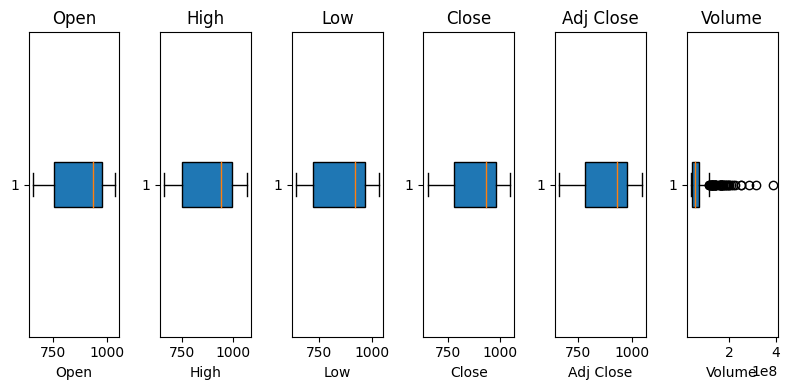

In [ ]:


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
for i, feature in enumerate(fts, start=1):
    plt.subplot(1, len(fts), i)
    plt.boxplot(data_valid[feature][outlierss[feature]], vert=False, patch_artist=True)
    plt.xlabel(feature)
    plt.title(f'{feature}')

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(data, columns):

    for column in columns:
        q1 = data[column].quantile(0.15)
        q3 = data[column].quantile(0.85)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data


data_valid = data
features = ['Open','High','Low','Close','Adj Close','Volume']
final_data = remove_outliers(data_valid, features)
for col, out in final_data.items():
    print(f'final data{col}: {len(out)}')

final dataDate: 8167
final dataOpen: 8167
final dataHigh: 8167
final dataLow: 8167
final dataClose: 8167
final dataAdj Close: 8167
final dataVolume: 8167


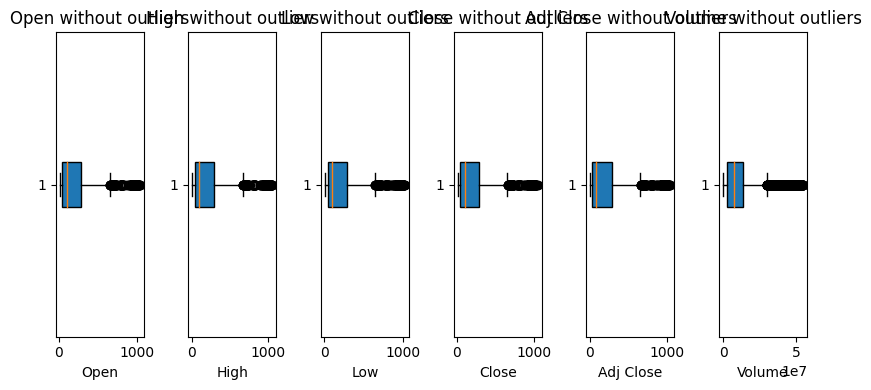

In [ ]:
plt.figure(figsize=(8, 4))
for i, feature in enumerate(fts, start=1):
    plt.subplot(1, len(fts), i)
    plt.boxplot(final_data[feature], vert=False, patch_artist=True)
    plt.xlabel(feature)
    plt.title(f'{feature} without outliers')

plt.tight_layout()
plt.show()


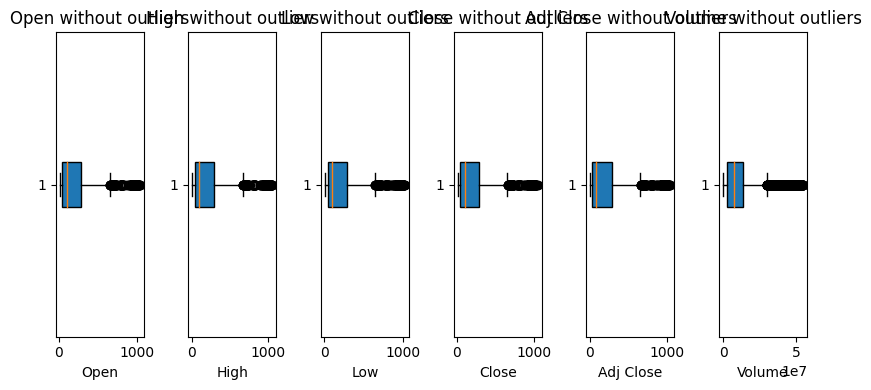

In [ ]:
plt.figure(figsize=(8, 4))
for i, feature in enumerate(fts, start=1):
    plt.subplot(1, len(fts), i)
    plt.boxplot(final_data[feature], vert=False, patch_artist=True)
    plt.xlabel(feature)
    plt.title(f'{feature} without outliers')

plt.tight_layout()
plt.show()


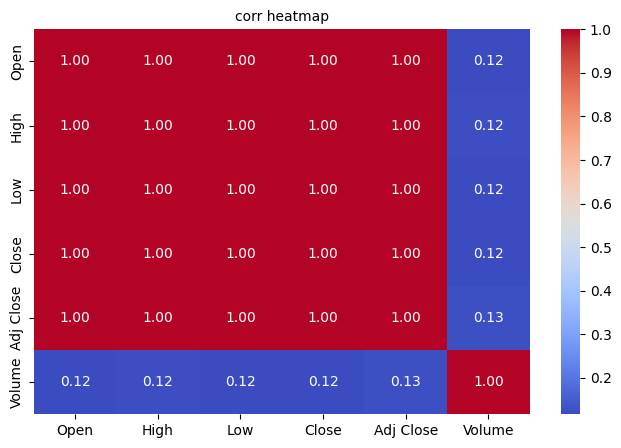

In [ ]:
import matplotlib.pyplot as plt
data_final=final_data.iloc[:,1:]
plt.figure(figsize=(8,5))
sns.heatmap(data_final.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('corr heatmap',fontsize=10)
plt.show()

In [ ]:
X=data_final.drop('Close' , axis=1)
y=data_final['Close']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
norm_x=scale.fit_transform(X)
norm_y=scale.fit_transform(np.array(y).reshape(-1,1))
X_train,X_test,y_train,y_test=train_test_split(norm_x,norm_y,test_size=0.3,random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
x_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(x_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)


(2451, 1, 5)
(5716, 1, 5)
(5716, 1)
(2451, 1)


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Bidirectional(GRU(128, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]),activation='tanh'))) # Fix input shape
model.add(Dropout(0.1))
model.add(Bidirectional(GRU(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]),activation='tanh'))) # Fix input shape
model.add(Dropout(0.1))
model.add(Bidirectional(GRU(128, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2]),activation='tanh'))) # Fix input shape
model.add(Dropout(0.1))
model.add(Bidirectional(GRU(128, activation='tanh')))
model.add(Dropout(0.1))
model.add(Dense(1))
model.build(input_shape=(None, X_train.shape[1], X_train.shape[2]))
model.summary()

optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.001, decay=1e-5)
model.compile(optimizer=optimizer, loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_27 (Bidirect  (None, 1, 256)            103680    
 ional)                                                          
                                                                 
 dropout_27 (Dropout)        (None, 1, 256)            0         
                                                                 
 bidirectional_28 (Bidirect  (None, 1, 256)            296448    
 ional)                                                          
                                                                 
 dropout_28 (Dropout)        (None, 1, 256)            0         
                                                                 
 bidirectional_29 (Bidirect  (None, 1, 256)            296448    
 ional)                                                          
                                                      

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
358/358 [==============================] - 10s 29ms/step - loss: 0.0302
Epoch 2/100
358/358 [==============================] - 9s 26ms/step - loss: 0.0301
Epoch 3/100
358/358 [==============================] - 6s 17ms/step - loss: 0.0299
Epoch 4/100
358/358 [==============================] - 9s 26ms/step - loss: 0.0298
Epoch 5/100
358/358 [==============================] - 12s 33ms/step - loss: 0.0296
Epoch 6/100
358/358 [==============================] - 11s 31ms/step - loss: 0.0294
Epoch 7/100
358/358 [==============================] - 9s 24ms/step - loss: 0.0293
Epoch 8/100
358/358 [==============================] - 6s 17ms/step - loss: 0.0292
Epoch 9/100
358/358 [==============================] - 8s 24ms/step - loss: 0.0290
Epoch 10/100
358/358 [==============================] - 6s 17ms/step - loss: 0.0288
Epoch 11/100
358/358 [==============================] - 10s 27ms/step - loss: 0.0287
Epoch 12/100
358/358 [==============================] - 6s 17ms/step - loss: 0.02

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
predict = model.predict(x_test)
predictions = scale.inverse_transform(predict)


77/77 [==============================] - 4s 7ms/step


In [ ]:
y_test_inv = scale.inverse_transform(y_test)
y_pred_classes = (predictions > 0.5).astype("int32")


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
y_test_classes = (y_test > 0.5).astype("int32")
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9678
F1 Score: 0.4060
Precision: 1.0000
Recall: 0.2547


In [ ]:


loss = model.evaluate(x_test, y_test)
print('loss:', loss)

77/77 [==============================] - 1s 7ms/step - loss: 0.0072
loss: 0.0071807121858000755


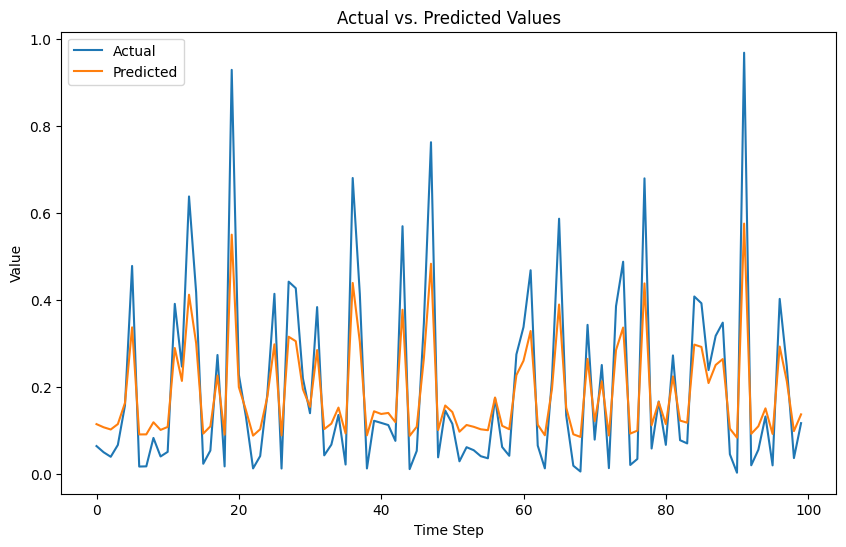

In [ ]:
import matplotlib.pyplot as plt

n = 100
plt.figure(figsize=(10, 6))
plt.plot(y_test[:n], label='Actual')
plt.plot(predict[:n], label='Predicted')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

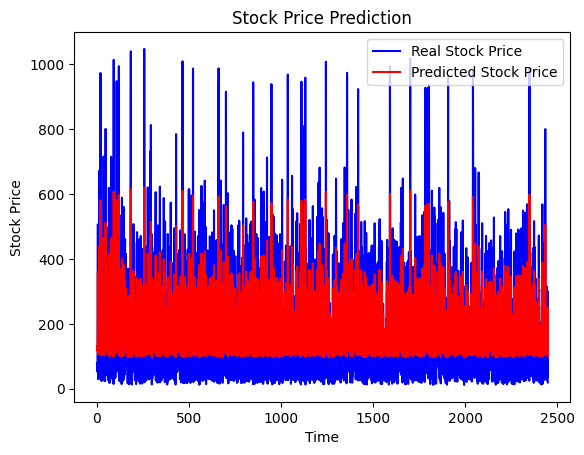

In [ ]:


import matplotlib.pyplot as plt
y_test_inverse = scale.inverse_transform(y_test)
plt.plot(y_test_inverse, color='blue', label='Real Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error



y_pred = model.predict(x_test)
y_true = y_test
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

77/77 [==============================] - 1s 8ms/step
Mean Squared Error: 0.0071807131934769185
Root Mean Squared Error: 0.08473908893466414
Mean Absolute Error: 0.06771632602827368
